In [ ]:
## Harmonic potential using numerov method 

### Finding energy eigenvalues
Define a function $f(\epsilon)$ which takes a guessed energy value $\epsilon$ and returns this:

$$f(\epsilon) = \frac{\psi_L(x_R - \Delta x) - \psi_R(x_R - \Delta x)}{\psi_L(x_R)}$$

Make a root search algorithm for $f(\epsilon)$. The roots are the energy eigenvalues

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# returns energy - potential
def Kn(n,E):
    return E-0.25*(xs[n]**2)
    
# calculates the wavefunction on next lattice point from prev two by Numerov algo
def numerov(dx,i,e,tp,ys):
    y = np.zeros(1)
    K3 = np.zeros(1)
    K2= np.zeros(1)
    K1= np.zeros(1)
    
    if dx>0: # evolves towards left
        K1,K2,K3 = Kn(i-2,e),Kn(i-1,e),Kn(i,e)
    
        y = 2*(1-(5/12)*dx**2 * K2)*ys[i-1] - (1+(1/12)*dx**2*K1)*ys[i-2]
        y = y/(1+(1/12)*(dx**2)*K3)

    else: # evolves towards right
        K1,K2,K3 = Kn(i+2,e),Kn(i+1,e),Kn(i,e) 
    
        y = 2*(1-(5/12)*dx**2 * K2)*ys[i+1-tp] - (1+(1/12)*dx**2*K1)*ys[i+2-tp]
        y = y/(1+(1/12)*(dx**2)*K3)

    return y

# to find the analytic turning points for harmonic potential 
def TP(E):
    return (4*E)**0.5

In [3]:
# caculates complete left and right wavefunctions for a given energy, and returns the derivative difference at the turning point (kink or not)
def f(e):
  
  # loop to find the turning point after x = 0
  for i in range(N):
    if xs[i]>=0:
        if abs(xs[i]-TP(e))<dx:
            tp = i
            break

  ys_left = np.zeros((tp+1)) 
  ys_right = np.zeros((N-tp+1)) 
  ys_left[0] = 0.0
  ys_left[1] = 1e-10

  ys_right[-1] = 0.0
  ys_right[-2] = 1e-10


  for i in range(2,len(ys_left)): # evaluate the wavefunction point by point along x axis
    ys_left[i] = numerov(dx,i,e,tp,ys_left)

  for i in range(N-3,tp-1,-1):
    ys_right[i-tp] = numerov(-dx,i,e,tp, ys_right)

  ratio = ys_left[-1]/ys_right[1]

  ys_right = ratio*ys_right

  ans = (ys_left[-2] - ys_right[0])/ys_left[-1]

  return (ans,ys_left, ys_right, tp)

In [4]:
## takes in starting values of energies, and finds the value of e which is a root to f(e) 
def rootsearch(r0,step):

  tol = 1e-10
  a = r0
  b = a+step

  while(f(a)[0]*f(b)[0]>0):
    a += step
    b += step

  while(abs(a-b)>tol) :

    c = (a+b)/2
    if f(c)[0]*f(a)[0]<0:
      b = c
    else:
      a = c

  while(abs(f(c)[0])>1e-5):
    all = rootsearch(c, step)
    c = all[0]

  return c, f(c)[1], f(c)[2], f(c)[3]

In [5]:
dx = 0.1
xlim = 20.0
xs = np.arange(-xlim,xlim+dx,dx)
N = len(xs)
print(N)

401


In [6]:
step = 0.1

eigenvalues = []
root, psi_l, psi_r, tp = rootsearch(0.001, step)
eigenvalues.append(root)

for i in range(0,10):
  root, psi_l, psi_r, tp = rootsearch(eigenvalues[-1]+step, step)
  eigenvalues.append(root)

print(eigenvalues)

[0.5078350796587764, 1.5090992588773373, 2.509972430136055, 3.5100583891607835, 4.510467199258507, 5.511996326245365, 6.5100001485310415, 7.512284932959814, 8.511217538289712, 9.512381157673877, 10.51309036046637]


In [7]:
PSI = f(eigenvalues[1]) # first eigenstate
tp =PSI[3]
psi_l = PSI[1]
psi_r = PSI[2]

Text(0, 0.5, 'Psi (dimensionles)')

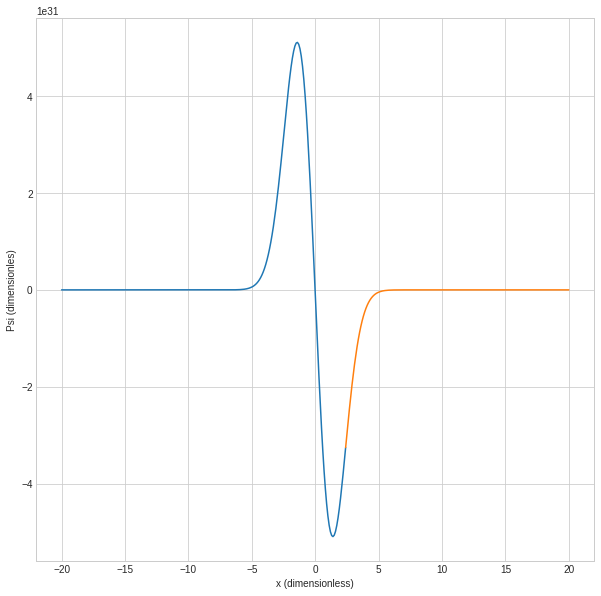

In [8]:
fig = plt.figure(figsize = (10,10))

#plt.plot(xs, 0.25*xs**2, label = 'Potential energy')

plt.plot(xs[0:tp+1],psi_l)
plt.plot(xs[tp:N],psi_r[1:len(psi_r)])
plt.xlabel("x (dimensionless)")
plt.ylabel("Psi (dimensionles)")


In [9]:
### 1

In [10]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline
import math

In [11]:
delta = 0.1
L = 6. 
N = int(L/delta) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)

In [12]:
def V(z):
    return z**2

E = 3

In [13]:
psil = np.zeros(2*N+1)
psil[0]=0
psil[1]=2.558835322304587e-10
psir = np.zeros(2*N+1)
psir[-1]=0
psir[-2]=2.79*2.558835322304587e-10

In [14]:
potential = np.array([V(delta*k) for k in range(-N,N+1)]) # Values of U(y) stored at lattice points

In [15]:
def k2(j):
    return (E - potential[j]) 
k2_array=abs(E-potential[N:2*N+1])
turningpt_index = np.where(k2_array==min(k2_array))[0][0] + N

In [16]:
for i in range(2,2*N+1):
    psil[i]= (2*(1-5/12*delta**2*k2(i-1))*psil[i-1]-(1+delta**2*k2(i-2)/12)*psil[i-2])/(1+delta**2*k2(i)/12)
for i in range(2*N-2,-1,-1):
    psir[i]= (2*(1-5/12*delta**2*k2(i+1))*psir[i+1]-(1+delta**2*k2(i+2)/12)*psir[i+2])/(1+delta**2*k2(i)/12)

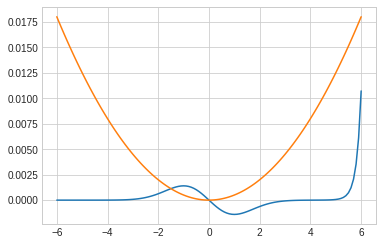

In [17]:
plt.plot(x, psil, label="eigenfunction")
plt.plot(x, 0.0005 * potential, label="Potential")

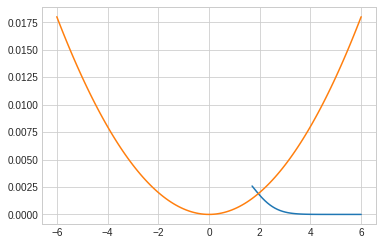

In [18]:
plt.plot(x[turningpt_index:2*N+1], psir[turningpt_index:2*N+1], label="eigenfunction")
plt.plot(x, 0.0005 * potential, label="Potential")

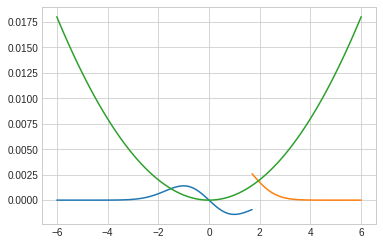

In [19]:
plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from left")
plt.plot(x[turningpt_index:2*N+1], psir[turningpt_index:2*N+1], label="eigenfunction from right")
plt.plot(x, 0.0005 * potential, label="Potential")

In [20]:
psir_scaled=psir*psil[turningpt_index]/psir[turningpt_index]

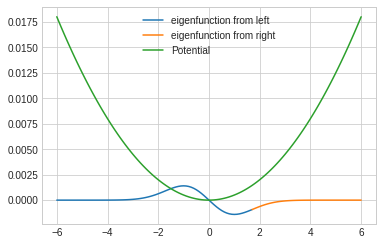

In [21]:
plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from left")
plt.plot(x[turningpt_index:2*N+1], psir_scaled[turningpt_index:2*N+1], label="eigenfunction from right")
plt.plot(x, 0.0005 * potential, label="Potential")
plt.legend()

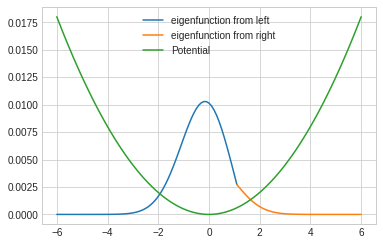

In [22]:
# wrong energies
#E = 1.32501
E = 1.2

psil = np.zeros(2*N+1)
psil[0]=0
psil[1]=2.558835322304587e-10
psir = np.zeros(2*N+1)
psir[-1]=0
psir[-2]=2.558835322304587e-10

def k2(j):
    return (E - potential[j]) 
k2_array=abs(E-potential[N:2*N+1])
turningpt_index = np.where(k2_array==min(k2_array))[0][0] + N

for i in range(2,2*N+1):
    psil[i]= (2*(1-5/12*delta**2*k2(i-1))*psil[i-1]-(1+delta**2*k2(i-2)/12)*psil[i-2])/(1+delta**2*k2(i)/12)
for i in range(2*N-2,-1,-1):
    psir[i]= (2*(1-5/12*delta**2*k2(i+1))*psir[i+1]-(1+delta**2*k2(i+2)/12)*psir[i+2])/(1+delta**2*k2(i)/12)

psir_scaled=psir*psil[turningpt_index]/psir[turningpt_index]

plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from left")
plt.plot(x[turningpt_index:2*N+1], psir_scaled[turningpt_index:2*N+1], label="eigenfunction from right")
plt.plot(x, 0.0005 * potential, label="Potential")
plt.legend()

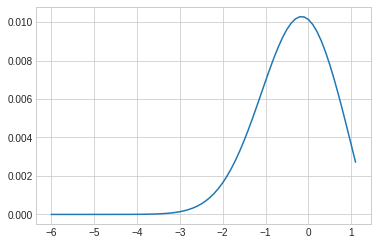

In [23]:
plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from right")


In [24]:
(psir_scaled[turningpt_index-1]-psil[turningpt_index-1])/psil[turningpt_index]

-0.2295020923940574

In [25]:
def deriv_diff(E):
    def k2(j):
        return (E - potential[j]) 
    k2_array=abs(E-potential[N:2*N+1])
    turningpt_index = np.where(k2_array==min(k2_array))[0][0] + N
    psil = np.zeros(2*N+1)
    psil[0]=0
    psil[1]=2.558835322304587e-10
    psir = np.zeros(2*N+1)
    psir[-1]=0
    psir[-2]=2.79*2.558835322304587e-10
    for i in range(2,2*N+1):
        psil[i]= (2*(1-5/12*delta**2*k2(i-1))*psil[i-1]-(1+delta**2*k2(i-2)/12)*psil[i-2])/(1+delta**2*k2(i)/12)
    for i in range(2*N-2,-1,-1):
        psir[i]= (2*(1-5/12*delta**2*k2(i+1))*psir[i+1]-(1+delta**2*k2(i+2)/12)*psir[i+2])/(1+delta**2*k2(i)/12)
    psir_scaled=psir*psil[turningpt_index]/psir[turningpt_index]
    return (psir_scaled[turningpt_index-1]-psil[turningpt_index-1])/psil[turningpt_index]

In [26]:
deriv_diff(1.3250000000000002887)

6.769449833791143

In [27]:
deriv_diff(1.01)

-0.004905766222693729

In [28]:
deriv_diff(.99)

0.004732459813388464

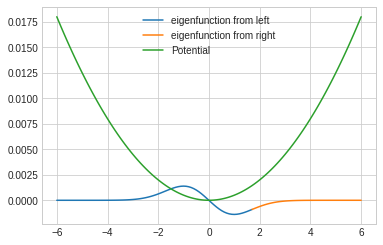

In [29]:
a = 3.43
b = 2.59
c = (a + b) / 2
while (deriv_diff(c) > 0.001):
  c = (a + b) / 2
  if deriv_diff(c) == 0:   
    break
  elif deriv_diff(a) * deriv_diff(c) < 0:
    b = c
  else:
    a = c
    
E = c

psil = np.zeros(2*N+1)
psil[0]=0
psil[1]=2.558835322304587e-10
psir = np.zeros(2*N+1)
psir[-1]=0
psir[-2]=2.558835322304587e-10

def k2(j):
    return (E - potential[j]) 
k2_array=abs(E-potential[N:2*N+1])
turningpt_index = np.where(k2_array==min(k2_array))[0][0] + N

for i in range(2,2*N+1):
    psil[i]= (2*(1-5/12*delta**2*k2(i-1))*psil[i-1]-(1+delta**2*k2(i-2)/12)*psil[i-2])/(1+delta**2*k2(i)/12)
for i in range(2*N-2,-1,-1):
    psir[i]= (2*(1-5/12*delta**2*k2(i+1))*psir[i+1]-(1+delta**2*k2(i+2)/12)*psir[i+2])/(1+delta**2*k2(i)/12)

psir_scaled=psir*psil[turningpt_index]/psir[turningpt_index]

plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from left")
plt.plot(x[turningpt_index:2*N+1], psir_scaled[turningpt_index:2*N+1], label="eigenfunction from right")
plt.plot(x, 0.0005 * potential, label="Potential")
plt.legend()